# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from yellowbrick.classifier import ClassificationReport, ConfusionMatrix
from scipy.spatial import distance

from sklearn import svm
from sklearn import preprocessing
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import DBSCAN

In [2]:
sns.set()

# Saving and loading the dataset

In [3]:
#load cancer dataset using sklearn dataset. Target is ['malignant', 'benign']
data = load_breast_cancer()

#tranform sklearn dataset to pandas DataFrame
df = pd.DataFrame(np.c_[data['data'], data['target']],
                  columns= np.append(data['feature_names'], ['target']))

#save cancer dataset to csv file
df.to_csv("breastCancer.csv", sep=',')

#read data from csv file
df = pd.read_csv("breastCancer.csv", header = 0, index_col = 0)

# Viewing the first and last rows of the dataset

In [4]:
df.head(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [5]:
df.tail(5)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


# Selecting specific columns from the data

In [6]:
df.columns.values

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension', 'target'],
      dtype=object)

In [7]:
#drop all columns except for some
df.drop(df.columns.difference(["mean radius", "radius error", "target"]), inplace=True, axis=1)

#save filtered dataset to csv file
df.to_csv("breastCancer-filtered.csv", sep=',')

df.head(5)

,mean radius,radius error,target
0,17.99,1.0950,0.0
1,20.57,0.5435,0.0
2,19.69,0.7456,0.0
3,11.42,0.4956,0.0
4,20.29,0.7572,0.0


# Normalizing values in the data

In [8]:
#normalize values
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalizedColumns = pd.DataFrame(x_scaled, columns=df.columns)

normalizedColumns.head()

,mean radius,radius error,target
0,0.521037,0.356147,0.0
1,0.643144,0.156437,0.0
2,0.601496,0.229622,0.0
3,0.210090,0.139091,0.0
4,0.629893,0.233822,0.0


# Separating the features from the target

In [9]:
#select the target column
target = normalizedColumns['target']

#drop it from the normalized data
normalizedColumns.drop(['target'], inplace=True, axis=1)

# Creating a classifier and training it

In [10]:
#SVM Classfier wit cross validation
X_train, X_test, y_train, y_test = train_test_split(normalizedColumns, target, test_size=0.3, random_state=0)
clf = svm.SVC(kernel='rbf', C=1,gamma='auto').fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train, cv=10)

print(f'Mean cross-validated score: {np.mean(scores)}\n')

Mean cross-validated score: 0.8618421052631579



# Results of the classification

In [11]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print('='*60)
print(classification_report(y_test,y_pred))

[[ 41  22]
 [  1 107]]
              precision    recall  f1-score   support

         0.0       0.98      0.65      0.78        63
         1.0       0.83      0.99      0.90       108

   micro avg       0.87      0.87      0.87       171
   macro avg       0.90      0.82      0.84       171
weighted avg       0.88      0.87      0.86       171



# Visualizing the results using YellowBrick

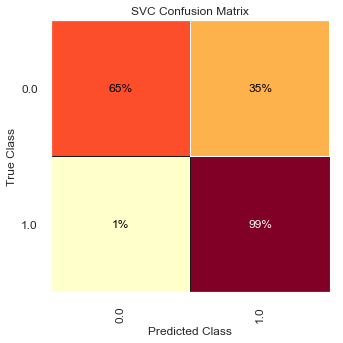

In [12]:
#figure size
sns.set(rc={'figure.figsize':(5,5)})

visualizer = ConfusionMatrix(clf, percent=True)
visualizer.score(X_test, y_test)
visualizer.poof()

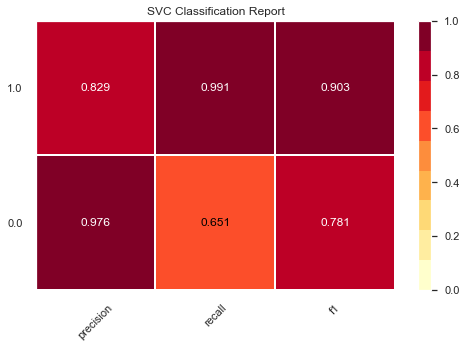

In [13]:
#figure size
sns.set(rc={'figure.figsize':(7,5)})

visualizer = ClassificationReport(clf, percent=True)
visualizer.score(X_test, y_test)
visualizer.poof()

# Moving from classification to clustering

In [14]:
#re-loading the full dataset
df = pd.read_csv("breastCancer.csv", header = 0)

#normalize values
x = df.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
normalizedColumns = pd.DataFrame(x_scaled)

# Computing pair-wise distances between points

In [15]:
# D = distance.squareform(distance.pdist(normalizedColumns))
D = distance.cdist(normalizedColumns, normalizedColumns) #same thing, pairwise distances
S = 1 - (D / np.max(D))

print(S.shape)

(569, 569)


# Computing DBSCAN clustering results

In [16]:
db = DBSCAN(eps=0.5, min_samples=5).fit(S)
core_samples = db.core_sample_indices_
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print(f'Estimated number of clusters: {n_clusters_}')

Estimated number of clusters: 7


# Visualizing the results using Matplotlib

Estimated number of points in cluster 0: 98
Estimated number of points in cluster 1: 9
Estimated number of points in cluster 2: 5
Estimated number of points in cluster 3: 6
Estimated number of points in cluster 4: 21
Estimated number of points in cluster 5: 13
Estimated number of points in cluster 6: 5
Estimated number of outliers: 412


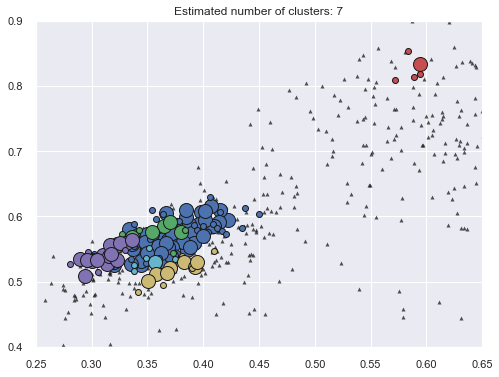

In [17]:
import matplotlib.pyplot as plt
from itertools import cycle

fig, ax = plt.subplots(figsize=[8,6])

# Black removed and is used for noise instead.
colors = cycle('bgrcmybgrcmybgrcmybgrcmyfghfdghfghyutjujh')
for k, col in zip(set(labels), colors):

    class_members = [index[0] for index in np.argwhere(labels == k)]
    cluster_core_samples = [index for index in core_samples
                                if labels[index] == k]

    #plotting all non-noise clusters as dots
    if k != -1:
        print(f'Estimated number of points in cluster {k}: {len(class_members)}')
        for index in class_members:
            x = S[index]
            if index in core_samples:
                markersize = 14
            else:
                markersize = 6
            ax.plot(x[0], x[1], 'o', markerfacecolor=col, markeredgecolor='k',
                    markeredgewidth=1, markersize=markersize)
    
    #plotting noise as small triangles
    else:
        print(f'Estimated number of outliers: {len(class_members)}')
        x = S[labels==k]
        ax.plot(x[0], x[1], 'k^', markersize=4, zorder=1, alpha=0.75)

#setting plot title and limits
ax.set(title=f'Estimated number of clusters: {n_clusters_}',
      xlim=[0.25, 0.65], ylim=[0.4, 0.9])
plt.show()